# Exercise 1

## Matheus Steigenberg Populim - 10734710

Importing essencial libraries and creating the network:

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from numpy import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

G = nx.Graph()
G.add_edge('1','2')
G.add_edge('1','4')
G.add_edge('2','4')
G.add_edge('4','3')
G.add_edge('2','3')
G.add_edge('3','5')
G.add_edge('3','6')
G.add_edge('3','7')
G.add_edge('6','7')

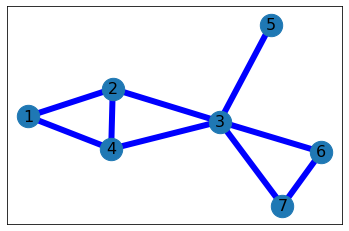

In [2]:
labels = G.nodes()
pos=nx.spring_layout(G)
nx.draw_networkx(G, with_labels = True, nodecolor='r', edge_color='b', 
        node_size=500, font_size=16, pos=pos, width=6) 
plt.show()

Now, let's take the number of nodes and edges

In [3]:
N = len(G)
M = G.number_of_edges()
print("Number of nodes: " , N , "\nNumber of edges:", M)

Number of nodes:  7 
Number of edges: 9


Defining a function that returns us the degree distribution:

In [4]:
def degreeDistribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues = arange(0,maxk+1)
    Pk = np.zeros(maxk+1) #create an array of zeros for counting the degree distribution
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) #converting the values to probabilities
    return kvalues,Pk    

Plotting the distribution

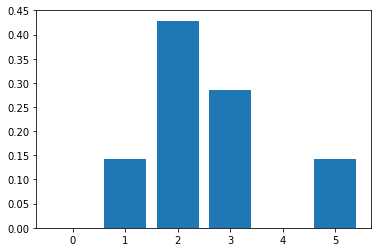

In [5]:
ks, Pk = degreeDistribution(G)

plt.figure()
plt.bar(ks, height = Pk)
plt.show()

We can also calculate the second moment (variance) of the degree distribution by defining a function:

In [6]:
def varianceDegreeDistribution(G):
    k,Pk = degreeDistribution(G)
    var = sum((k**2)*Pk) - (sum(k*Pk))**2
    return var

In [7]:
print("Second moment of degree distribution: ", varianceDegreeDistribution(G))

Second moment of degree distribution:  1.387755102040817


Now we're calculating the entropy of the degree distribution by Shannon's entropy formula:

In [8]:
def shannonEntropy(G):
    k,Pk = degreeDistribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, exp(1))
    return H

In [9]:
print("Networks entropy: ", shannonEntropy(G))

Networks entropy:  1.277034259466139


Now we're calculating the transitivy of the network:

In [10]:
print("Networks transitivity: " ,nx.transitivity(G))

Networks transitivity:  0.47368421052631576


And also the Clustering Coefficient of each node:

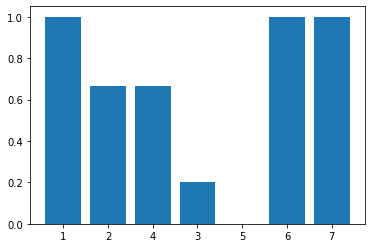

In [11]:
vcc = []
for i in G.nodes():
    vcc.append(nx.clustering(G, i))
vcc = np.array(vcc)
plt.figure()
nodenumbers = np.array(G.nodes())
plt.bar(nodenumbers, height = vcc)
plt.show()

From the mean of the CC of all the nodes, we can get the Global Clustering Coefficient(GCC) of the network:

In [12]:
globalCC = sum(vcc)/G.number_of_nodes()
print("Global Clustering Coefficient: ", globalCC)

Global Clustering Coefficient:  0.6476190476190476


We can observe that the GCC is close to the network's transitivity. 

At last, we can show the network's adjacency matrix

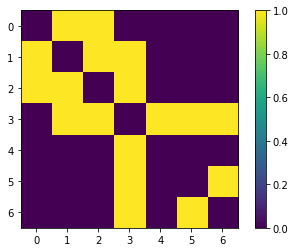

In [13]:
matrix = nx.to_numpy_matrix(G)
plt.imshow(matrix)
plt.colorbar()
plt.show()